In [ ]:
# t-SNE http://www.scikit-yb.org/en/latest/api/text/tsne.html

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import HashingVectorizer
import codecs

class Corpus(object):
    def __init__(self, sentences):
        self.documents = codecs.open(sentences, encoding="utf-8").readlines()
        self.document_list = []
        for d in self.documents:
            self.document_list.append([d])

def load_corpus():
    c = Corpus("all_posts01.txt")
    return c
    

corpus = load_corpus()


In [ ]:
#tfidf  = TfidfVectorizer(stop_words='english')
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,
                                 min_df=2,
                                 use_idf=True)
#transformer =  TfidfTransformer()
#tfidf = make_pipeline(hasher,transformer)
docs   = vectorizer.fit_transform(corpus.documents)

print(docs)

true_k = 500
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(docs)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

#for i in range(true_k):
    #print("Cluster %d:" % i)
    #for ind in order_centroids[i, :10]:
        #print(' %s' % terms[ind])
        

In [ ]:
tsne = TSNEVisualizer(labels=["documents"])
tsne.fit(docs)
tsne.poof()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA, FastICA
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import euclidean
import numpy as np

stri = 'Any girl being topless hey'
response = vectorizer.transform([stri])
r = [((i, j), response[i,j]) for i, j in zip(*response.nonzero())]
for entry in r:
    word = terms[entry[0][1]]
    confidence = entry[1]
    print(word)
    print(float(confidence))


In [ ]:
import gensim
import codecs
# used for loading or saving
model_file = 'C:\\Users\\mrzl\\phaedra\short_text.doc2vec'
filename = 'C:\\Users\\mrzl\\phaedra\short_text.txt'

sentences = []
from random import shuffle

for uid, line in enumerate(codecs.open(filename, encoding='utf-8')):
    ls = gensim.models.doc2vec.LabeledSentence(words=line.split(), tags=['SENT_%s' % uid])
    sentences.append(ls)
print(len(sentences),'sentences')


# Training the doc2vec model

# tutorial https://rare-technologies.com/doc2vec-tutorial/
# proposes shuffling or learning reate adjustment. we gonna do both
# in total 20 epochs
model = gensim.models.Doc2Vec(alpha=0.025, min_alpha=0.025)  # use fixed learning rate
print('building vocab') 
model.build_vocab(sentences)

base_alpha = model.alpha
base_min_alpha = model.min_alpha

for mepoch in range(2):
    model.alpha = base_alpha 
    model.min_alpha = base_min_alpha
    for epoch in range(10):
        print('epoch',mepoch * 10 + epoch)
        model.train(sentences, total_examples=model.corpus_count, epochs=5)
        model.alpha -= 0.002  # decrease the learning rate
        model.min_alpha = model.alpha  # fix the learning rate, no decay
    shuffle(sentences)

# saving the model    
model.save(model_file)



In [1]:
import gensim
import codecs
# used for loading or saving
model_file = 'C:\\Users\\mrzl\\phaedra\\all_posts01.doc2vec'

# Tiny helper
def nice_print(tagged_doc):
    return (' '.join(sentences[int(tagged_doc[0][5:])][0]))

# Build sentence list (each sentence needs at least 1 tag)
filename = 'C:\\Users\\mrzl\\phaedra\\all_posts01.txt'

model_file = 'C:\\Users\\mrzl\\phaedra\short_text.doc2vec'
filename = 'C:\\Users\\mrzl\\phaedra\short_text.txt'

sentences = []
from random import shuffle

for uid, line in enumerate(codecs.open(filename, encoding='utf-8')):
    ls = gensim.models.doc2vec.LabeledSentence(words=line.split(), tags=['SENT_%s' % uid])
    sentences.append(ls)
print(len(sentences),'sentences')

model_loaded = gensim.models.Doc2Vec.load(model_file)

# Test: printing sentence 9 and getting the most similar ones.

number = 201
print(' '.join(sentences[number][0]))
sims = model_loaded.docvecs.most_similar('SENT_'+str(number))
print('similar sentence',len(sims))
print('\nSIMILAR SENTENCES\n')
for sim in sims:
    print(nice_print(sim))






C:\Users\mrzl\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


1794 sentences
anyone into bro/sis fun?
similar sentence 10

SIMILAR SENTENCES

any guys into underage curvy sluts?
any guys into gangbangchat?
any ladies into phoneeeeeeeeeeeeeeee or mint
hay any women into black cock?Cost
any ladies into phon
any ladies into phoneeeeor micc. sexx
any ladies into phoneeeeeeee or mioc
any girls into proana here?
Hello, anyone on here into married guys?
anyone want naughty fun?


C:\Users\mrzl\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = model_loaded[model_loaded.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.savefig("out.png")

[[-0.08268186 -0.4614209  -0.80519325 ...  0.1912371  -0.5299137
  -0.1899935 ]
 [-0.17405991 -0.08209605 -0.02597687 ... -0.7620915  -0.34852183
  -0.21675865]
 [-0.5937592  -0.3934616  -1.2033886  ... -0.37822562 -1.1649827
   0.18726872]
 ...
 [-0.2771629  -0.26555333  0.4498138  ... -0.03167247 -0.30459508
  -0.44223824]
 [ 0.6764322  -0.6037198   0.81406796 ...  0.4093952  -0.4386157
  -0.287421  ]
 [ 0.5521364  -0.46156594  0.14188148 ... -0.30080172 -0.158037
  -0.44775605]]


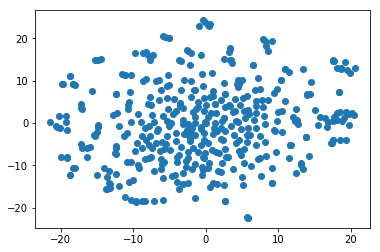

In [ ]:
print (' '.join(sentences[9][0]))
sims = model.docvecs.most_similar('SENT_10')
print('similar sentence',len(sims))
print('\nSIMILAR SENTENCES\n')
for sim in sims:
    print(nice_print(sim))


# Tiny helper
def nice_print(tagged_doc):
    return(' '.join(sentences[int(tagged_doc[0][5:])][0]))